In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset (update the filename as needed)
df = pd.read_csv("train.csv")

# df = df[df["Category"] != "BPO"]
# df.to_csv('train.csv', index=False)

# View first few rows
df['Category'].value_counts()

Category
Education                    410
Mechanical Engineer          384
Electrical Engineering       384
Consultant                   368
Civil Engineer               364
Sales                        364
Management                   361
Human Resources              360
Digital Media                358
Accountant                   350
Java Developer               348
Operations Manager           345
Building and Construction    345
Testing                      344
Architecture                 344
Business Analyst             340
Aviation                     340
Finance                      339
SQL Developer                338
Public Relations             337
Health and Fitness           332
Arts                         332
Network Security Engineer    330
DotNet Developer             329
Apparel                      320
Banking                      314
Automobile                   313
Web Designing                309
SAP Developer                304
Data Science                 299
E

In [6]:
df.shape

(12795, 2)

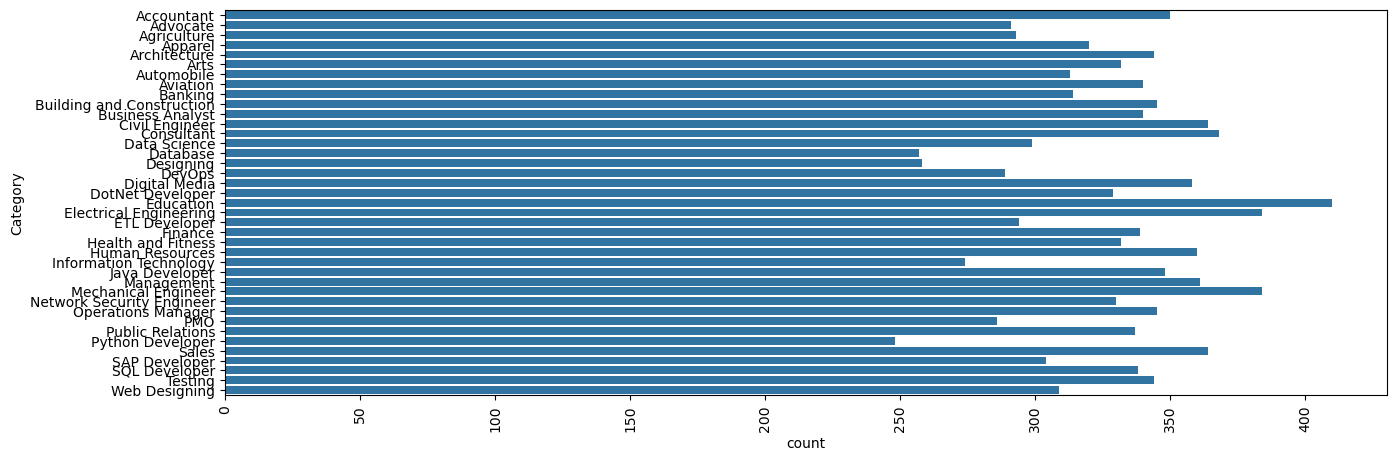

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [5]:
from sklearn.utils import resample

# Define the maximum count among all categories
max_count = df['Category'].value_counts().max()

# Resample each category to match the maximum count
balanced_data = []
for category in df['Category'].unique():
    category_data = df[df['Category'] == category]
    if len(category_data) < max_count:
        # Perform oversampling for categories with fewer samples
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
        # Perform undersampling for categories with more samples
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)

# Concatenate the balanced data for all categories
balanced_df = pd.concat(balanced_data)

In [7]:
# balanced_df = balanced_df[balanced_df["Category"] != "Public Relations"]
balanced_df['Category'].value_counts()

Category
Accountant                   410
Network Security Engineer    410
Finance                      410
Health and Fitness           410
Human Resources              410
Information Technology       410
Java Developer               410
Management                   410
Mechanical Engineer          410
Operations Manager           410
Electrical Engineering       410
PMO                          410
Public Relations             410
Python Developer             410
Sales                        410
SAP Developer                410
SQL Developer                410
Testing                      410
ETL Developer                410
Education                    410
Advocate                     410
Building and Construction    410
Agriculture                  410
Apparel                      410
Architecture                 410
Arts                         410
Automobile                   410
Aviation                     410
Banking                      410
Business Analyst             410
D

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Assuming you have job roles or categories as labels
y = balanced_df["Category"]  
X = balanced_df["Text"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()  # Convert text into numeric form
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)

print(X.shape)  # Check the dimensions of processed data

(15990,)


In [13]:
# Train a Random Forest model
model = SVC(kernel="linear")
model.fit(X_train_tf, y_train)

# Make predictions
y_pred = model.predict(X_test_tf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.91


In [15]:
# import joblib

# joblib.dump(model, "resume_screening_model.pkl")  # Save model
# joblib.dump(vectorizer, "tfidf_vectorizer.pkl")  # Save TF-IDF vectorizer
y = df["Category"]  
X = df["Text"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


['tfidf_vectorizer.pkl']

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train a Logistic Regression model
model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(X_train_tf, y_train)

# Evaluate the model
y_pred = model_LR.predict(X_test_tf)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8633520950594121
